# kNN algorithm
* k-NN (K-Nearest Neighbour)은 지도학습 (supervised learning)을 위해 사용할 수 있는 간단한 분류 알고리즘 중 하나이다.
* 공간 내 k개의 가장 가까운 훈련 데이터로 구성되어 있다. 출력은 k-NN이 분류로 사용되었는지 또는 회귀로 사용되었는지에 따라 다르다.
* k-NN은 함수가 오직 지역적으로 근사하고 모든 계산이 분류될 때까지 연기되는 인스턴스 기반 학습 또는 게으른 학습의 일종이다.
* k-NN 알고리즘의 단점은 데이터의 지역 구조에 민감하다는 것이다.

In [1]:
# directory setup
import os
myhome=os.path.expanduser('~')
mywd=os.path.join(myhome,'Desktop/S_ParkMinJi/src/')
mytxt=os.path.join(myhome,'Desktop/S_ParkMinJi/doc/')
print myhome, mywd, mytxt

C:\Users\MinJi C:\Users\MinJi\Desktop/S_ParkMinJi/src/ C:\Users\MinJi\Desktop/S_ParkMinJi/doc/


## 1. 기본적인 kNN 예제 

results:  [[ 1.]]
neighbours:  [[ 1.  1.  0.  1.  1.]]
distances:  [[  20.   26.  265.  333.  464.]]


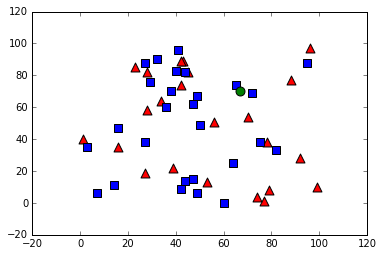

In [6]:
%matplotlib inline

import cv2
import numpy as np
import matplotlib.pyplot as plt

#200개의 훈련 데이터를 생성한다. (x,y)좌표에 데이터가 존재하게 된다.
trainData = np.random.randint(0,100,(50,2)).astype(np.float32)

#각 훈련 데이터를 0 또는 1이라고 분류한다.
responses = np.random.randint(0,2,(50,1)).astype(np.float32)

#라벨이름, (x,y) 좌료 를 출력해본다.
#for i in range(0,200):  
#    print responses[i], trainData[i]  

#0이라 이름 부여진 데이터를 뽑아서 red클래스로 가져온다. 
red = trainData[responses.ravel()==0]
#1이라 이름 붙여진 데이터를 뽑아서 blue클래스로 가져온다.
blue = trainData[responses.ravel()==1]

#화면에 빨간색 삼각형과 파란색 사각형을 (x,y)좌표에 출력해준다. 
plt.scatter(red[:,0],red[:,1],80,'r','^')
plt.scatter(blue[:,0],blue[:,1],80,'b','s')

#knn알고리즘을 초기화한다.
knn = cv2.ml.KNearest_create()
#데이터의 좌표와 라벨을 전달하여 모델을 훈련시키다. 
knn.train(trainData,cv2.ml.ROW_SAMPLE,responses)

#새로 추가되는 데이터를 만들어서 화면에 표시한다. 
newcomer = np.random.randint(0,100,(1,2)).astype(np.float32)
plt.scatter(newcomer[:,0],newcomer[:,1],80,'g','o')

#k=5으로 해서 최근접 이웃들을 찾아서 새로 추가된 데이터가 어느쪽에 속하는 지 결정한다.
ret, results, neighbours, dist = knn.findNearest(newcomer, 5)

#분류 결과
print "results: ", results
#k개 이웃 정보
print "neighbours: ", neighbours
#k개 이웃과의 거리
print "distances: ", dist

plt.show()

## 2. Machine Learning in Action 예제

In [2]:
%cd {mywd}

C:\Users\MinJi\Desktop\S_ParkMinJi\src


In [153]:
import knn
from numpy import *
import operator
from os import listdir

def createDataSet():
    group = array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]]) # trainingSet
    labels = ['A','A','B','B'] # labels
    return group, labels

In [11]:
group, labels = knn.createDataSet()

print group
print labels

[[ 1.   1.1]
 [ 1.   1. ]
 [ 0.   0. ]
 [ 0.   0.1]]
['A', 'A', 'B', 'B']


In [12]:
# input
# 1. inX: test data (features)
# 2. dataSet: data set (list of features)
# 3. labels: classification labels
# 4. k: num of neighbhors
# output: list of majority

def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    diffMat = tile(inX, (dataSetSize,1)) - dataSet
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1) #행으로 더하기
    distances = sqDistances**0.5
    sortedDistIndicies = distances.argsort()     
    classCount={}  
    
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
        voteIlabel, classCount[voteIlabel]
    classCount
    sortedClassCount = sorted(classCount.iteritems(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

knn.classify0([0.5,0.5], group, labels, 3)

B 1
A 1
B 2
{'A': 1, 'B': 2}


'B'

In [161]:
def file2matrix(filename):
    love_dictionary={'largeDoses':3, 'smallDoses':2, 'didntLike':1}
    fr = open(filename)
    arrayOLines = fr.readlines()
    numberOfLines = len(arrayOLines)            #get the number of lines in the file
    returnMat = zeros((numberOfLines,3))        #prepare matrix to return
    classLabelVector = []                       #prepare labels return   
    index = 0
    for line in arrayOLines:
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index,:] = listFromLine[0:3]
        if(listFromLine[-1].isdigit()):
            classLabelVector.append(int(listFromLine[-1]))
        else:
            classLabelVector.append(love_dictionary.get(listFromLine[-1]))
        index += 1
    return returnMat,classLabelVector

In [166]:
datingDataMat, datingLabels = knn.file2matrix('data/datingTestSet2.txt')
print datingDataMat
print datingLabels[0:20]

[[  4.09200000e+04   8.32697600e+00   9.53952000e-01]
 [  1.44880000e+04   7.15346900e+00   1.67390400e+00]
 [  2.60520000e+04   1.44187100e+00   8.05124000e-01]
 ..., 
 [  2.65750000e+04   1.06501020e+01   8.66627000e-01]
 [  4.81110000e+04   9.13452800e+00   7.28045000e-01]
 [  4.37570000e+04   7.88260100e+00   1.33244600e+00]]
[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3]


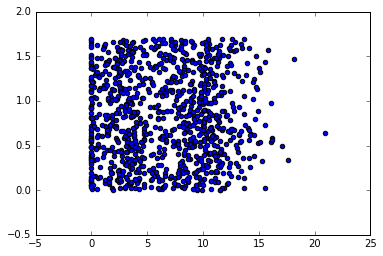

In [167]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure()
ax= fig.add_subplot(111)
ax.scatter(datingDataMat[:,1],datingDataMat[:,2])
plt.show()

In [188]:
def img2vector(filename):
    returnVect = zeros((1,1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0,32*i+j] = int(lineStr[j])
    return returnVect

In [189]:
testVector = knn.img2vector('data/digits/testDigits/0_13.txt')
testVector[0,0:31]
testVector[0,32:63]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.])

In [2]:
def handwritingClassTest():
    hwLabels = []
    trainingFileList = listdir('data/digits/trainingDigits')           #load the training set
    m = len(trainingFileList)
    trainingMat = zeros((m,1024))
    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]     #take off .txt
        classNumStr = int(fileStr.split('_')[0])
        hwLabels.append(classNumStr)
        trainingMat[i,:] = img2vector('data/digits/trainingDigits/%s' % fileNameStr)
    testFileList = listdir('data/digits/testDigits')        #iterate through the test set
    errorCount = 0.0
    mTest = len(testFileList)
    for i in range(mTest):
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0]     #take off .txt
        classNumStr = int(fileStr.split('_')[0])
        vectorUnderTest = img2vector('data/digits/testDigits/%s' % fileNameStr)
        classifierResult = classify0(vectorUnderTest, trainingMat, hwLabels, 3)
        print "the classifier came back with: %d, the real answer is: %d" % (classifierResult, classNumStr)
        if (classifierResult != classNumStr): errorCount += 1.0
    print "\nthe total number of errors is: %d" % errorCount
    print "\nthe total error rate is: %f" % (errorCount/float(mTest))

In [6]:
knn.handwritingClassTest()

 0 1
0 2
0 3
{0: 3}
the classifier came back with: 0, the real answer is: 0
0 1
0 2
0 3
{0: 3}
the classifier came back with: 0, the real answer is: 0
0 1
0 2
0 3
{0: 3}
the classifier came back with: 0, the real answer is: 0
0 1
0 2
0 3
{0: 3}
the classifier came back with: 0, the real answer is: 0
0 1
0 2
0 3
{0: 3}
the classifier came back with: 0, the real answer is: 0
0 1
0 2
0 3
{0: 3}
the classifier came back with: 0, the real answer is: 0
0 1
0 2
0 3
{0: 3}
the classifier came back with: 0, the real answer is: 0
0 1
0 2
0 3
{0: 3}
the classifier came back with: 0, the real answer is: 0
0 1
0 2
0 3
{0: 3}
the classifier came back with: 0, the real answer is: 0
0 1
0 2
0 3
{0: 3}
the classifier came back with: 0, the real answer is: 0
0 1
0 2
0 3
{0: 3}
the classifier came back with: 0, the real answer is: 0
0 1
0 2
0 3
{0: 3}
the classifier came back with: 0, the real answer is: 0
0 1
0 2
0 3
{0: 3}
the classifier came back with: 0, the real answer is: 0
0 1
0 2
0 3
{0: 3}
the c

## Load and return the iris dataset (classification)
* R의 내장 데이터 iris는 각 50개씩 3종류, 총 150개의 붗꽃에 관한 데이터로 4가지의 특성을 측정한 데이터이다.
* 꽃받침조각(Sepal)의 길이(Sepal.Length)와 넓이(Sepal.Width), 꽃잎(Petal)의 길이(Petal.Length)와 넓이(Petal.Width)를 측정한 것이다.
* 붗꽃의 종류는 Setosa, Versicolor, Viginica의 3종류가 있다.

In [12]:
%cd {mywd}

C:\Users\MinJi\Desktop\S_ParkMinJi\src


In [69]:
#Learning data information
from sklearn.datasets import load_iris

data = load_iris()
print data.feature_names #the meaning of the features
print data.data #the data to learn
print data.target #the classification labels
print data.target_names #the meaning of the labels

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.

In [129]:
from sklearn.datasets import load_iris
import numpy as np
import knn

data = load_iris()

for i in range(10): 
    sl = np.random.randint(4.3, 7.9)
    sw = np.random.randint(2.0, 4.4)
    pl = np.random.randint(1.0, 6.9)
    pw = np.random.randint(0.1, 2.5)
    newflower = [sl, sw, pl, pw]
    result = knn.classify0(newflower, data.data, data.target, 15)
    print "The data of new flower is %s, and it is %s" % (newflower, data.target_names[result])

The data of new flower is [4, 2, 4, 0], and it is versicolor
The data of new flower is [6, 3, 1, 0], and it is setosa
The data of new flower is [6, 2, 5, 1], and it is versicolor
The data of new flower is [5, 3, 1, 0], and it is setosa
The data of new flower is [5, 3, 4, 0], and it is versicolor
The data of new flower is [5, 2, 5, 0], and it is versicolor
The data of new flower is [5, 2, 4, 1], and it is versicolor
The data of new flower is [6, 2, 1, 0], and it is setosa
The data of new flower is [5, 3, 5, 0], and it is versicolor
The data of new flower is [6, 2, 3, 0], and it is versicolor


### Reference
* http://webnautes.tistory.com/800
* http://stackoverflow.com/questions/32980675/knn-train-in-cv2-with-opencv-3-0
* http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html
* https://en.wikipedia.org/wiki/Iris_flower_data_set